In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



import folium
# a nice way of filtering out deprecated warnings
import warnings
warnings.filterwarnings("ignore")
from bokeh.plotting import figure, show
from bokeh.tile_providers import get_provider, Vendors

from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

# to display bokeh plots inside jupyter, we need to use output_notebook
from bokeh.io import save, reset_output, output_notebook

TILE = get_provider("STAMEN_TERRAIN_RETINA")
reset_output()
output_notebook()

Loading BokehJS ...

In [3]:
green_data_2015 = pd.read_pickle('../preprocessed_data/drop_green_tripdata_2015.pkl')

In [4]:
COORDS = ['Pickup_longitude','Pickup_latitude', 'Dropoff_longitude','Dropoff_latitude']
PU_COORDS= ['Pickup_latitude','Pickup_longitude']
DO_COORDS= ['Dropoff_latitude','Dropoff_longitude']
longitude_message=['Pickup_longitude', 'Dropoff_longitude']
latitude_message=['Pickup_latitude', 'Dropoff_latitude']
tip_detail = ['Pickup_longitude','Pickup_latitude', 'Dropoff_longitude','Dropoff_latitude','Tip_amount']
key_attribute= ['Pickup_longitude','Pickup_latitude', 'Dropoff_longitude','Dropoff_latitude', 'Passenger_count','Trip_distance']
amount=['Fare_amount', 'Tip_amount', 'Total_amount','Trip_distance']
trip_detail=['Passenger_count','Trip_distance']
key_colS = ["Passenger_count", "Trip_distance", "Fare_amount", "Tip_amount", "Total_amount"]


In [5]:
#Venue: Madison Square Garden and BARCLAYS CENTER
MSG_Venue_coord=[40.750298, -73.993324]
BC_Venue_coord=[40.68265, -73.97469]
MSG_Venue_coordM=np.array(MSG_Venue_coord)
BC_Venue_coordM=np.array(BC_Venue_coord)

In [6]:
Boundary_box=green_data_2015[DO_COORDS].describe().loc[['min','max']].values
main_coords=green_data_2015[DO_COORDS].describe().loc[['50%']].values[0]
yRange, xRange = sorted(i[0] for i in Boundary_box), sorted(i[1] for i in Boundary_box)

In [ ]:
# initialise a map
NY_map1 = folium.Map(location=main_coords, tiles="Stamen Terrain", zoom_start=12)

# show map
folium.Marker(BC_Venue_coord, popup="<b>BARCLAYS CENTER</b>", icon=folium.Icon(color='green')).add_to(NY_map1)
NY_map1.save('../plots/map1.html')
NY_map1

In [8]:
#concert period
Chris_Brown_concert_period= green_data_2015[(green_data_2015["lpep_pickup_datetime"]<'2015-02-16 23:59:59') & 
                                                (green_data_2015["lpep_pickup_datetime"]>'2015-02-16 00:00:00')]

In [8]:
#concert period
Neil_Diamond_concert_period= green_data_2015[(green_data_2015["lpep_pickup_datetime"]<'2015-03-25 23:59:59') & 
                                                (green_data_2015["lpep_pickup_datetime"]>'2015-03-15 00:00:00')]

In [9]:
#sport period
NBA_AllStar_Game_period=green_data_2015[(green_data_2015["lpep_pickup_datetime"]<'2015-02-15 23:59:59') & 
                                                (green_data_2015["lpep_pickup_datetime"]>'2015-02-13 00:00:00')]

In [9]:
concert_days=['02-16','03-25']
sport_days=['02-13','02-14','02-15']
weekend_days=['01-03','01-04','01-10','01-11','01-17','01-18','01-24','01-25','01-31','02-01','02-07',
            '02-08','02-14','02-15','02-21','02-22','02-28','03-01','03-07','03-08','03-14','03-15','03-21','03-22','03-28','03-29']

In [ ]:
# cluster map of Chris_Brown concert period
Chris_Brown_concertM=folium.Map(location=BC_Venue_coord, tiles="Stamen Terrain", zoom_start=15)
FastMarkerCluster(Chris_Brown_concert_period[DO_COORDS]).add_to(Chris_Brown_concertM)

folium.Marker(BC_Venue_coord, popup="<b>BARCLAYS CENTER</b>", icon=folium.Icon(color='blue')).add_to(Chris_Brown_concertM)
folium.Circle(radius=200,location=BC_Venue_coord,popup="<b>BARCLAYS CENTER</b>",color='#3186',fill=True,).add_to(Chris_Brown_concertM)
Chris_Brown_concertM.save('../plots/Chris_Brown_concert_cluster.html')

Chris_Brown_concertM

In [ ]:
# cluster map of Neil_Diamond concert period
Neil_Diamond_concertM=folium.Map(location=BC_Venue_coord, tiles="Stamen Terrain", zoom_start=15)
FastMarkerCluster(Neil_Diamond_concert_period[DO_COORDS]).add_to(Neil_Diamond_concertM)

folium.Marker(BC_Venue_coord, popup="<b>BARCLAYS CENTER</b>", icon=folium.Icon(color='blue')).add_to(Neil_Diamond_concertM)
folium.Circle(radius=200,location=BC_Venue_coord,popup="<b>BARCLAYS CENTER</b>",color='#3186',fill=True,).add_to(Neil_Diamond_concertM)
Neil_Diamond_concertM.save('../plots/Neil_Diamond_concert_cluster.html')

Neil_Diamond_concertM

In [ ]:
# cluster map of nba all star concert period
NBA_AllStar_GameM=folium.Map(location=BC_Venue_coord, tiles="Stamen Terrain", zoom_start=15)
FastMarkerCluster(NBA_AllStar_Game_period[DO_COORDS]).add_to(NBA_AllStar_GameM)

folium.Marker(BC_Venue_coord, popup="<b>BARCLAYS CENTER</b>", icon=folium.Icon(color='blue')).add_to(NBA_AllStar_GameM)
folium.Circle(radius=200,location=BC_Venue_coord,popup="<b>BARCLAYS CENTER</b>",color='#3186',fill=True,).add_to(NBA_AllStar_GameM)
NBA_AllStar_GameM.save('../plots/Green_taxi_NBA_AllStar_Game_cluster.html')

NBA_AllStar_GameM

In [11]:
#count by date
green_data_2015['date']=green_data_2015["lpep_pickup_datetime"].str[5:10]
date_count=green_data_2015['date'].value_counts().sort_index()

In [12]:
#count by time
green_data_2015['time']=green_data_2015["lpep_pickup_datetime"].str[11:13]+':00'
time_count=green_data_2015['time'].value_counts().sort_index()

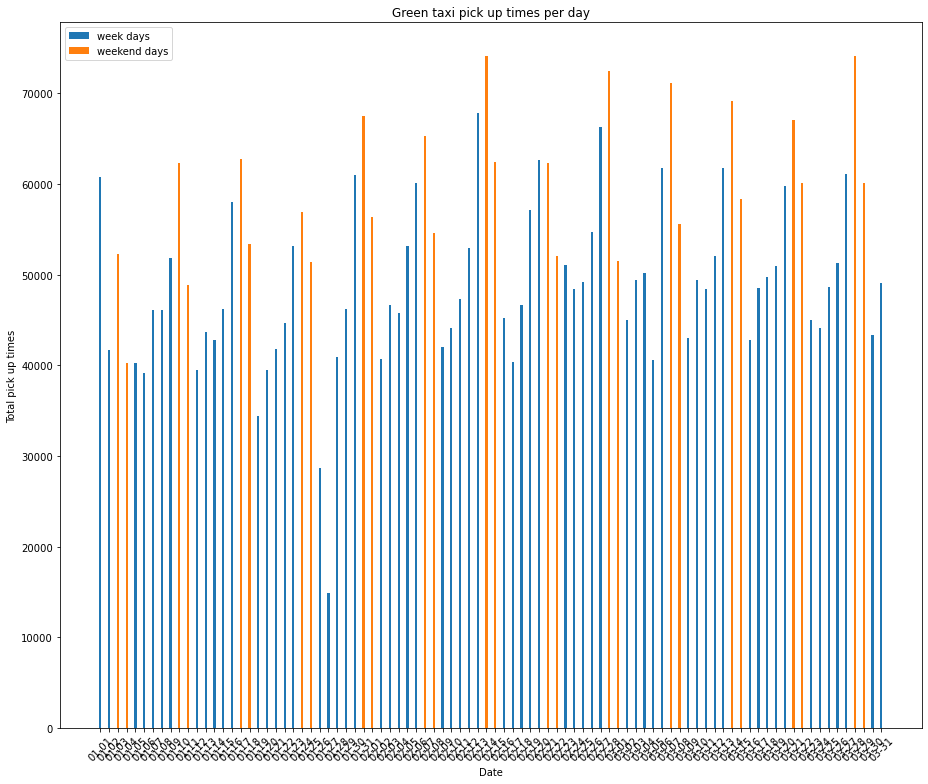

In [13]:
#plot Green taxi pick up times per day
days_bar_count=date_count
for i in range(len(days_bar_count)):
    if (days_bar_count.index[i] not in weekend_days):
        days_bar_count[days_bar_count.index[i]]=0

labels= date_count.index
date_count=green_data_2015['date'].value_counts().sort_index()

x=np.arange(len(labels))

width=0.25

fig, ax = plt.subplots(1, 1, figsize=(13, 11))
work_bar=ax.bar(x, date_count,width,label='week days')
weekend_day_bar=ax.bar(x, days_bar_count,width, label='weekend days')

ax.set_ylabel("Total pick up times")
ax.set_title("Green taxi pick up times per day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
fig.tight_layout()

plt.savefig('../plots/Green taxi pick up times per day.jpeg')
plt.show()

What will affect the demand of taxi?

In [14]:
green_data_2015=green_data_2015[(green_data_2015["Payment_type"]==1)]
tip_count_date=green_data_2015.groupby("date")["Tip_amount"].sum()
tip_count_time=green_data_2015.groupby("time")["Tip_amount"].sum()
date_count=green_data_2015['date'].value_counts().sort_index()
time_count=green_data_2015['time'].value_counts().sort_index()
avg_tip_day=tip_count_date/date_count
avg_tip_time=tip_count_time/time_count

In [15]:
weekend_bar_count=avg_tip_day.copy()
weekday_bar_count=avg_tip_day.copy()
concert_bar_count=avg_tip_day.copy()
sport_bar_count=avg_tip_day.copy()

for i in range(len(weekend_bar_count)):
    if (weekend_bar_count.index[i] not in weekend_days):
        weekend_bar_count[weekend_bar_count.index[i]]=0

for i in range(len(concert_bar_count)):
    if (concert_bar_count.index[i] not in concert_days):
        concert_bar_count[concert_bar_count.index[i]]=0

for i in range(len(sport_bar_count)):
    if (sport_bar_count.index[i] not in sport_days):
        sport_bar_count[sport_bar_count.index[i]]=0

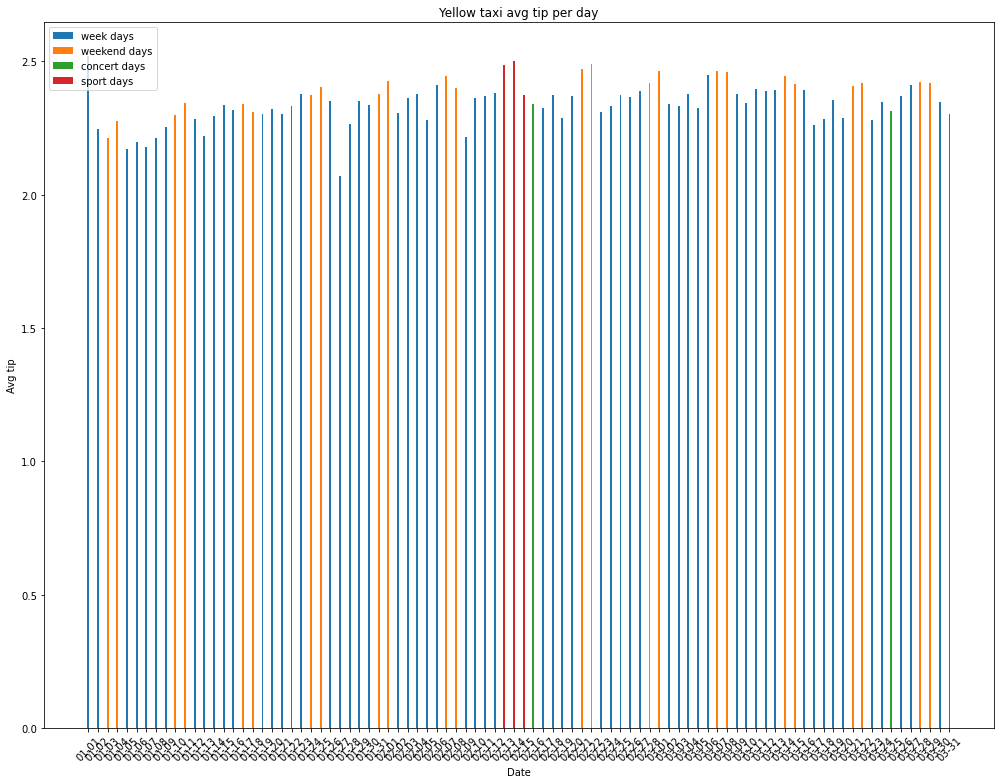

In [16]:
#green taxi avg tip in week days, weekend, concert days, sport days
new_labels=avg_tip_day.index
x=np.arange(len(new_labels))
width=0.2

fig, ax = plt.subplots(1, 1, figsize=(14, 11))
weekday_bar=ax.bar(x, weekday_bar_count,width,label='week days')
weekend_day_bar=ax.bar(x, weekend_bar_count,width, label='weekend days')
concert_day_bar=ax.bar(x, concert_bar_count,width, label='concert days')
sport_day_bar=ax.bar(x, sport_bar_count,width, label='sport days')

ax.set_ylabel("Avg tip")
ax.set_title("Yellow taxi avg tip per day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
fig.tight_layout()

plt.savefig('../plots/Green taxi avg tip per day.jpeg')
plt.show()

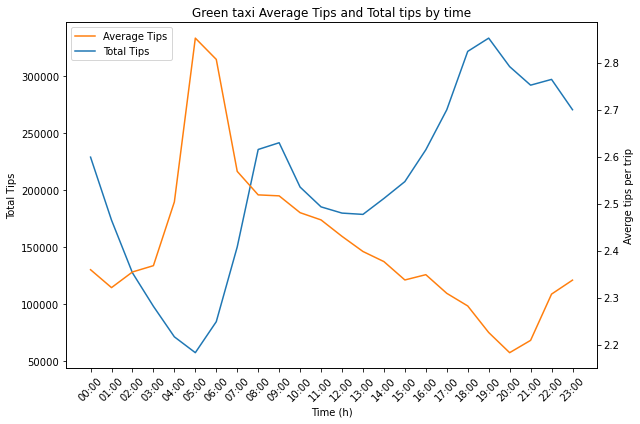

In [17]:
#Green taxi Average Tips and Total tips by time
fig, ax=plt.subplots(figsize=(9,6),sharex=True)
ax1=ax.twinx()

total=ax.plot(tip_count_time,'C0-',label='Total tips')
avg=ax1.plot(avg_tip_time,'C1-',label='Average Tips')
ax1.set_ylabel('Averge tips per trip')
ax.set_xticklabels(time_count.index,rotation=45)

ax.legend(avg+total,['Average Tips','Total Tips'],loc=0)
ax.set_xlabel("Time (h)")
ax.set_ylabel('Total Tips')
ax.set_title('Green taxi Average Tips and Total tips by time')

fig.tight_layout()
plt.show()
fig.savefig('../plots/Green taxi Average Tips and Total tips by time.jpeg')

In [18]:
#green taxi attributes correlation
green_data_2015[key_colS].corr()

,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Total_amount
Passenger_count,1.000000,0.006600,0.008111,0.012752,0.010479
Trip_distance,0.006600,1.000000,0.952622,0.623851,0.942127
Fare_amount,0.008111,0.952622,1.000000,0.639360,0.982967
Tip_amount,0.012752,0.623851,0.639360,1.000000,0.751521
Total_amount,0.010479,0.942127,0.982967,0.751521,1.000000


In [ ]:
#green taxi attributes correlation heatmap
sns.heatmap(green_data_2015[key_colS].corr())
plt.show()